In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [18]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
0,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,0,1,29.0,Zeebrugge,0.0,2,B,8380,99000,10957010,West Flanders,Flanders,1,0,4,flat_studio,203,0,1,1,2,residential_sale
1,6,13,1920,Belgium,Tournai,0,NON_FLOOD_ZONE,0,0,2,391.0,Tournai,0.0,3,D,7500,765000,10956841,Hainaut,Wallonie,31,1,4,apartment_block,130,0,0,5,1,residential_sale
2,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,0,1,111.0,BLANKENBERGE,0.0,2,B,8370,399000,10956807,West Flanders,Flanders,3,0,4,house,0,0,0,2,1,residential_sale
3,1,4,1979,Belgium,Veurne,0,NON_FLOOD_ZONE,0,1,1,113.6,De Panne,0.0,2,F,8660,230000,10956664,West Flanders,Flanders,9,1,2,house,170,0,1,2,1,residential_sale
4,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,0,1,92.0,Hasselt,0.0,2,B,3500,198000,10956668,Limburg,Flanders,1,0,5,apartment,400,0,1,1,2,residential_sale


In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
df.shape

(94891, 30)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94891 entries, 0 to 94890
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathroomcount      94891 non-null  int64  
 1   bedroomcount       94891 non-null  int64  
 2   constructionyear   94891 non-null  int64  
 3   country            94891 non-null  object 
 4   district           94891 non-null  object 
 5   fireplace          94891 non-null  int64  
 6   floodingzone       94891 non-null  object 
 7   furnished          94891 non-null  int64  
 8   garden             94891 non-null  int64  
 9   kitchen            94891 non-null  int64  
 10  livingarea         94891 non-null  float64
 11  locality           94888 non-null  object 
 12  monthlycharges     94891 non-null  float64
 13  numberoffacades    94891 non-null  int64  
 14  peb                94891 non-null  object 
 15  postalcode         94891 non-null  int64  
 16  price              948

# **CHARTS**

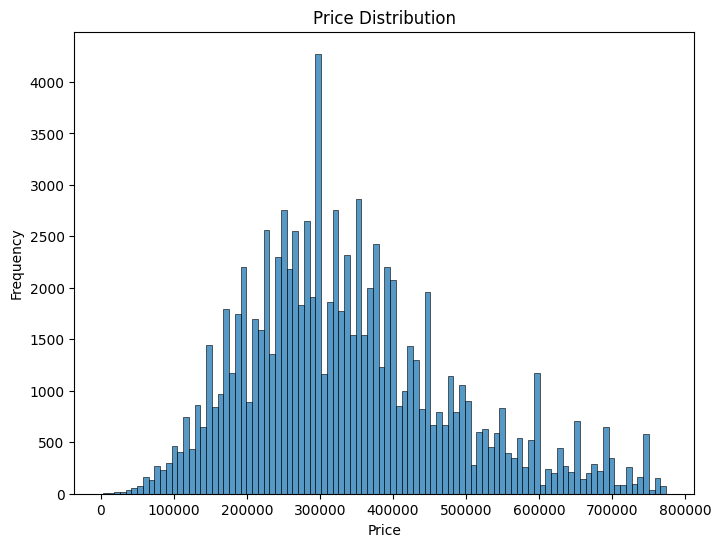

In [22]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.histplot(df.price, kde = False, ax = ax)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [23]:
df.price.describe()

count     94891.000000
mean     340274.627710
std      142804.815854
min        2500.000000
25%      239000.000000
50%      320000.000000
75%      419000.000000
max      773850.000000
Name: price, dtype: float64

In [24]:
df.dtypes

bathroomcount          int64
bedroomcount           int64
constructionyear       int64
country               object
district              object
fireplace              int64
floodingzone          object
furnished              int64
garden                 int64
kitchen                int64
livingarea           float64
locality              object
monthlycharges       float64
numberoffacades        int64
peb                   object
postalcode             int64
price                  int64
propertyid             int64
province              object
region                object
roomcount              int64
showercount            int64
stateofbuilding        int64
subtypeofproperty     object
surfaceofplot          int64
swimmingpool           int64
terrace                int64
toiletcount            int64
typeofproperty         int64
typeofsale            object
dtype: object

# **Numeric Feature**

Text(0.5, 1.0, 'Numeric Feature Heatmap')

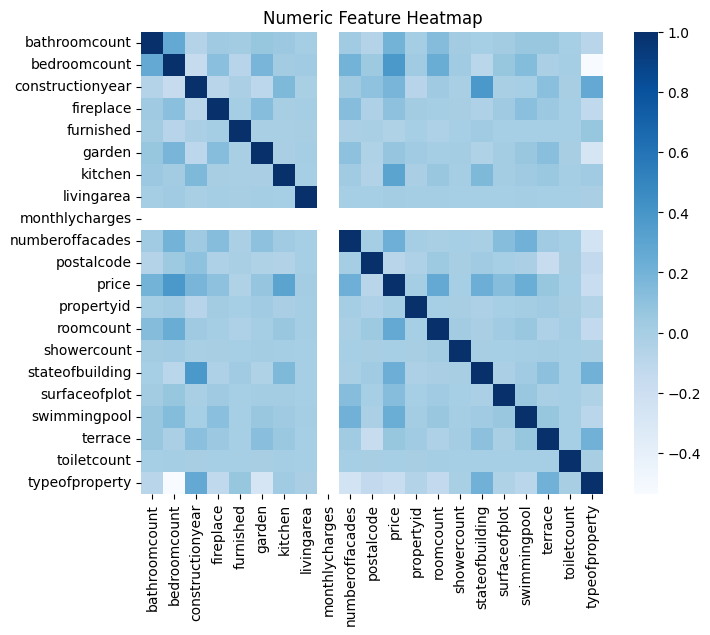

In [25]:
fig, ax = plt.subplots(figsize = (8, 6))
correlation = df.select_dtypes(include = ['float64', 'int64', 'int32']).corr()
sns.heatmap(correlation, ax = ax, vmax = 1, square = True, cmap='Blues')
plt.title('Numeric Feature Heatmap')

### Delete Outliers in LIVINGAREA

In [28]:
display(df.shape)
Q1 = df['livingarea'].quantile(0.1)
Q3 = df['livingarea'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# print(lower_bound, upper_bound)
df = df[(df['livingarea'] > lower_bound) & (df['livingarea'] < upper_bound)]
# display(df.shape)


(94665, 30)

# **Correlation**

In [26]:
display(df.shape)
Q1 = df['bedroomcount'].quantile(0.1)
Q3 = df['bedroomcount'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)
df = df[(df['bedroomcount'] > lower_bound) & (df['bedroomcount'] < upper_bound)]
# display(df.shape)


(94891, 30)

-3.5 8.5


In [116]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()


correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation


,price
price,1.000000
livingarea,0.507109
bedroomcount,0.387997
per_square,0.326610
kitchen,0.304198
roomcount,0.267859
stateofbuilding,0.235937
swimmingpool,0.234031
numberoffacades,0.223279
decade,0.191363


# **LIVING AREA vs PRICE**


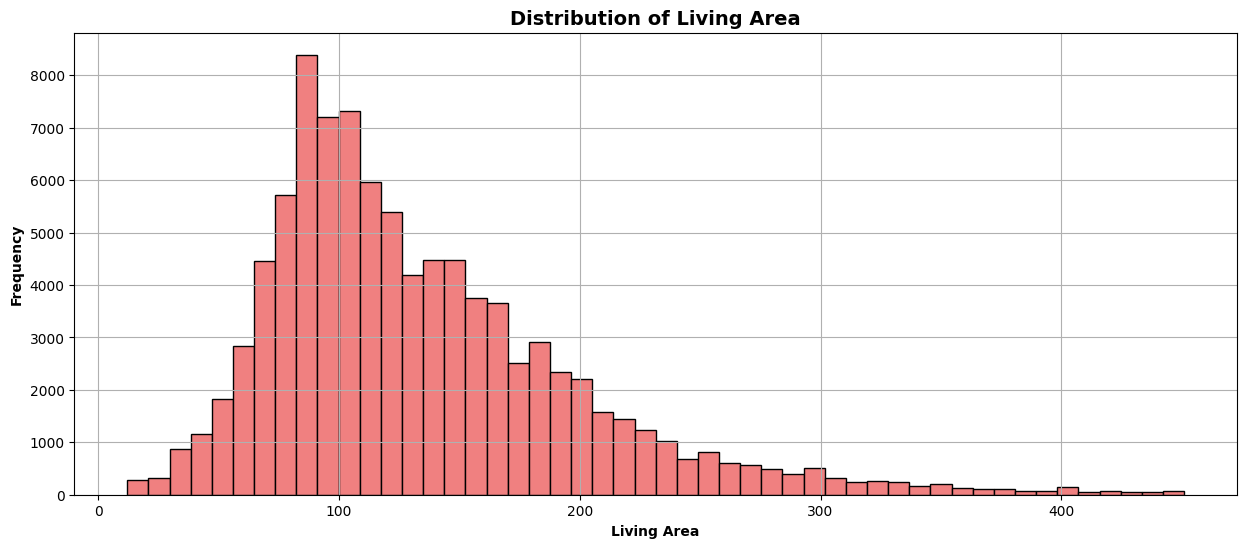

In [117]:
plt.figure(figsize=(15, 6))
plt.hist(df['livingarea'], bins=50, color='lightcoral', edgecolor='black')
plt.title("Distribution of Living Area", weight='bold', fontsize=14)
plt.xlabel("Living Area", weight='bold')
plt.ylabel("Frequency", weight='bold')
plt.grid(True)
plt.show()

# **PROVINCES vs AVG PRICES** 

In [118]:
avg_price_province = df.groupby('province')['price'].mean().reset_index()
avg_price_province.head()

,province,price
0,Antwerp,360828.376228
1,Brussels,372750.701648
2,East Flanders,353152.303204
3,Flemish Brabant,401054.862258
4,Hainaut,241209.191289


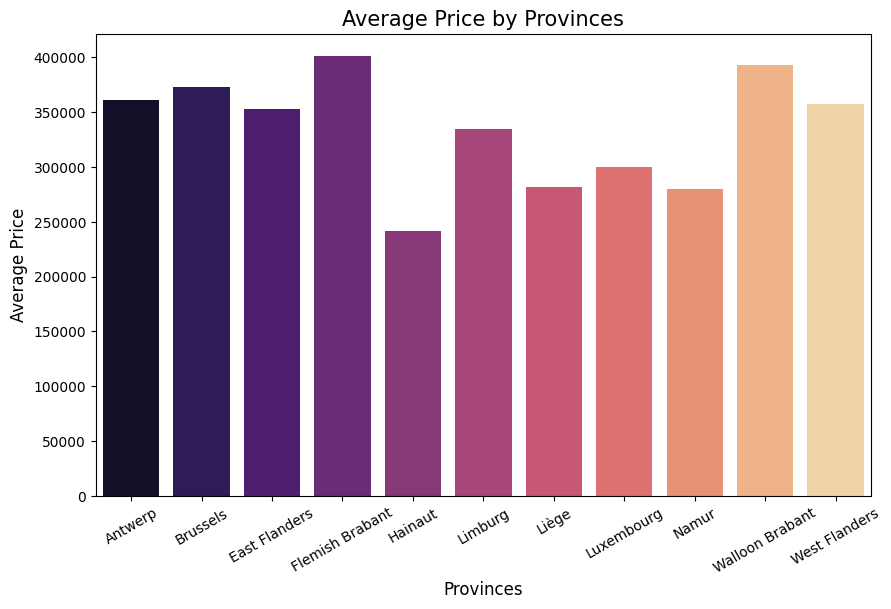

In [119]:
plt.figure(figsize=(10, 6))
sns.barplot(data = avg_price_province, y ="price", x ="province", hue = 'province', palette='magma')
plt.xticks(rotation=30)
plt.xlabel('Provinces',  fontsize = 12)
plt.ylabel('Average Price',  fontsize = 12)
plt.title('Average Price by Provinces',  fontsize = 15)
plt.show()

# **DECADES vs AVG PRICES** 

In [110]:
def year_to_decade(year):
    return (year // 10) * 10

df['decade'] = df['constructionyear'].apply(year_to_decade)

In [111]:
decades = df.groupby('decade')['price'].mean().reset_index()

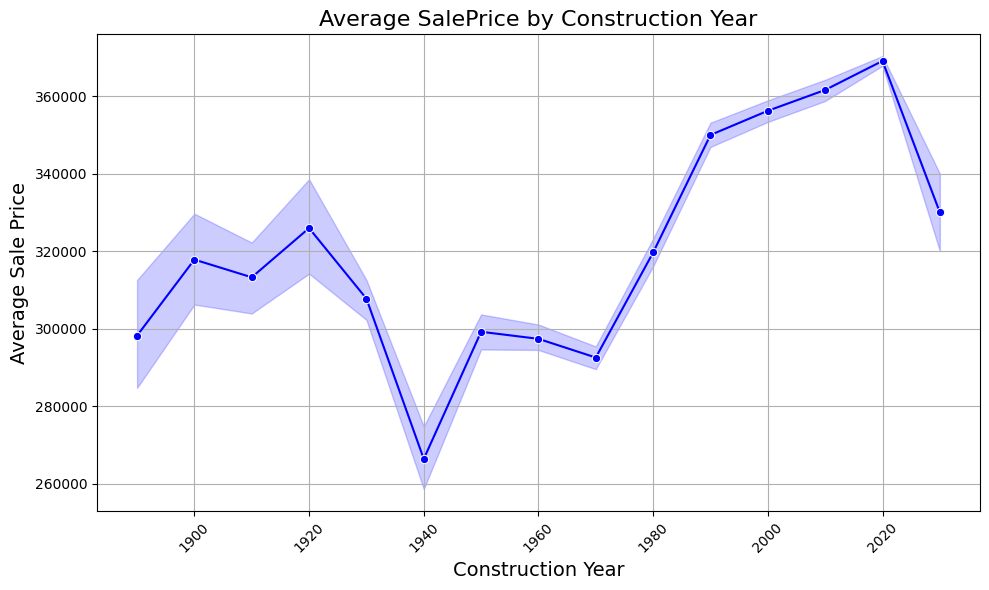

In [112]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='decade', y='price', marker='o', color='b')

plt.title('Average SalePrice by Construction Year', fontsize=16)
plt.xlabel('Construction Year', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

# **Bedroom Count VS Price**

In [120]:
bedr_mean = df.groupby('bedroomcount')['price'].mean().reset_index()


<Axes: xlabel='bedroomcount', ylabel='price'>

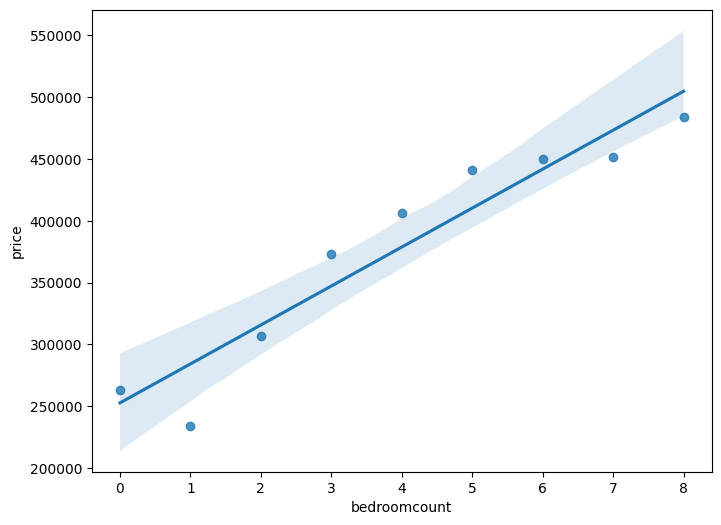

In [121]:


fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'bedroomcount', y='price' , data=bedr_mean, ax=ax)

price per square meter

In [129]:

df['per_square'] = df['price'] / df['livingarea']
df['per_square'].head()

0    3413.793103
2    3594.594595
3    2024.647887
4    2152.173913
5    4300.000000
Name: per_square, dtype: float64

#

In [123]:
df['dist_per_square'] = df.groupby('district')['per_square'].mean().reset_index()

ValueError: Cannot set a DataFrame with multiple columns to the single column dist_per_square

In [51]:
a = df.groupby('province')['per_square'].mean().reset_index()
a.head()

,province,per_square
0,Antwerp,2912.179477
1,Brussels,3685.291848
2,East Flanders,2547.449317
3,Flemish Brabant,3241.889199
4,Hainaut,1888.304416


In [52]:
a = df.groupby('region')['per_square'].mean().reset_index()
a.head()

,region,per_square
0,Brussels,3685.291848
1,Flanders,2986.411922
2,Wallonie,2251.292032


C:\Users\mehme\AppData\Local\Temp\ipykernel_43760\364553876.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2,1].set_xticklabels(avg_price_province['province'], rotation = 70, fontsize = 10)


NameError: name 'state' is not defined

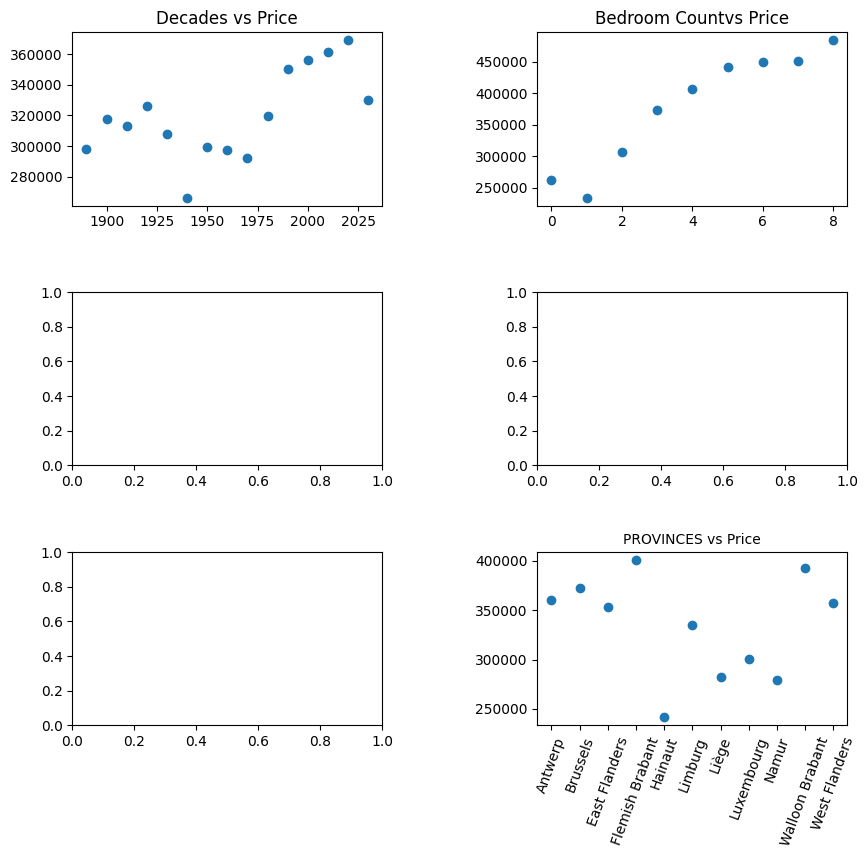

In [122]:
fig, ax = plt.subplots(3, 1, figsize = (10, 9))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)




ax[2,1].scatter(avg_price_province['province'], avg_price_province['price'])
ax[2,1].set_title('PROVINCES vs Price', fontsize = 10)
ax[2,1].set_xticklabels(avg_price_province['province'], rotation = 70, fontsize = 10)

ax[0,0].scatter(decades['decade'], decades['price'])
ax[0,0].set_title('Decades vs Price')
ax[0,1].scatter(bedr_mean['bedroomcount'], bedr_mean['price'])
ax[0,1].set_title('Bedroom Countvs Price')


ax[1,0].scatter(state['stateofbuilding'], state['price'])
ax[1,0].set_title('State of Building vs Price')
plt.tight_layout()


# ax[1,1].scatter(df['bathroomcount'], property_prices)
# ax[1,1].set_title('Bathroom Count vs Price')
# ax[2,0].scatter(df['numberoffacades'], property_prices)
# ax[2,0].set_title('Number of Facades vs Price')
# ax[2,1].scatter(df['roomcount'], property_prices)
# ax[2,1].set_title('Room Count vs Price')
# plt.tight_layout()



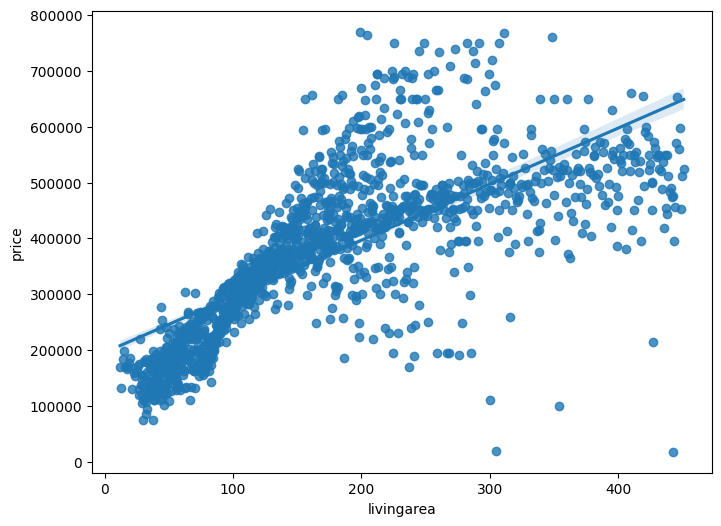

In [41]:
liv_area = df.groupby('livingarea')['price'].mean().reset_index()

fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'livingarea', y='price', data=liv_area, ax=ax);

In [22]:
state = df.groupby('stateofbuilding')['price'].mean().reset_index()
state.head()

,stateofbuilding,price
0,0,234988.470732
1,1,266599.615565
2,2,272424.553281
3,3,306133.764133
4,4,352220.164169


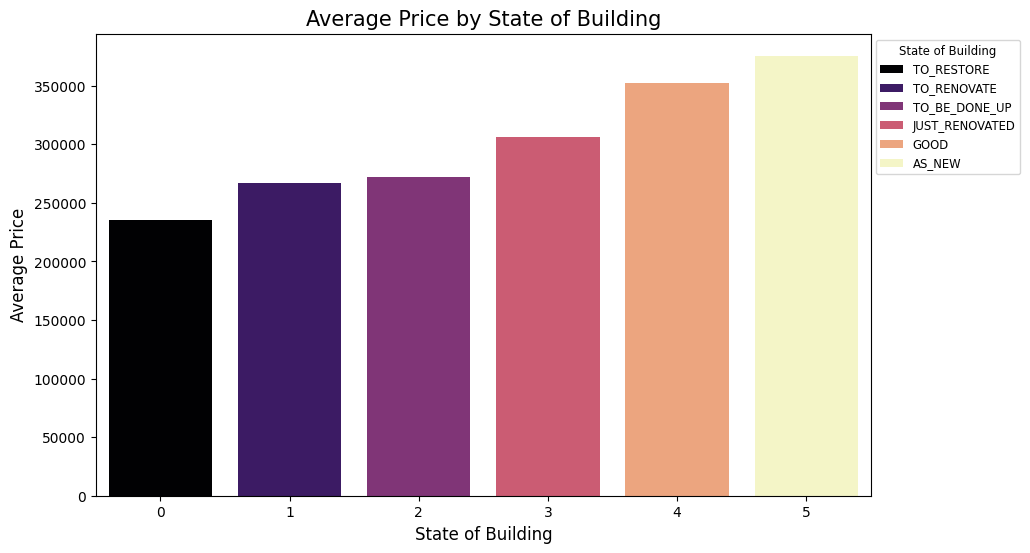

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data = state, y="price", x="stateofbuilding",hue = 'stateofbuilding', palette='magma');
plt.legend(loc='upper right', title='State of Building', fontsize='small', title_fontsize='small')
# plt.xticks(rotation=30)
plt.xlabel('State of Building',  fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.title('Average Price by State of Building',  fontsize = 15)


legend_labels = ['TO_RESTORE', 'TO_RENOVATE', 'TO_BE_DONE_UP', 'JUST_RENOVATED', 'GOOD', 'AS_NEW']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.20, 1), title='State of Building', fontsize='small', title_fontsize='small')



plt.show()

In [25]:
df.region.value_counts()

region
Flanders    57443
Wallonie    28804
Brussels     8644
Name: count, dtype: int64

Text(0.5, 1.0, 'Region vs Price')

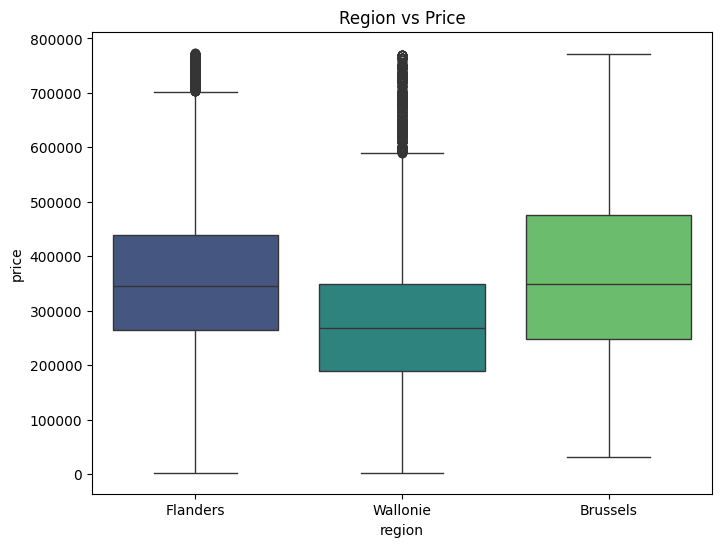

In [59]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'region', y = 'price',hue = 'region', data = df, ax=ax, palette='viridis')
plt.title('Region vs Price')

In [27]:
df.typeofproperty.value_counts()

typeofproperty
1    48181
2    46710
Name: count, dtype: int64

In [91]:
type_home = df.groupby('typeofproperty')['price'].mean().reset_index()
display(type_home)
property_mapping = { 1: 'HOUSE', 2: 'APARTMENT'}
type_home['typeofproperty'] = type_home['typeofproperty'].map(property_mapping)
display(type_home)                                        

,typeofproperty,price
0,1,364328.797036
1,2,315462.940013


,typeofproperty,price
0,HOUSE,364328.797036
1,APARTMENT,315462.940013


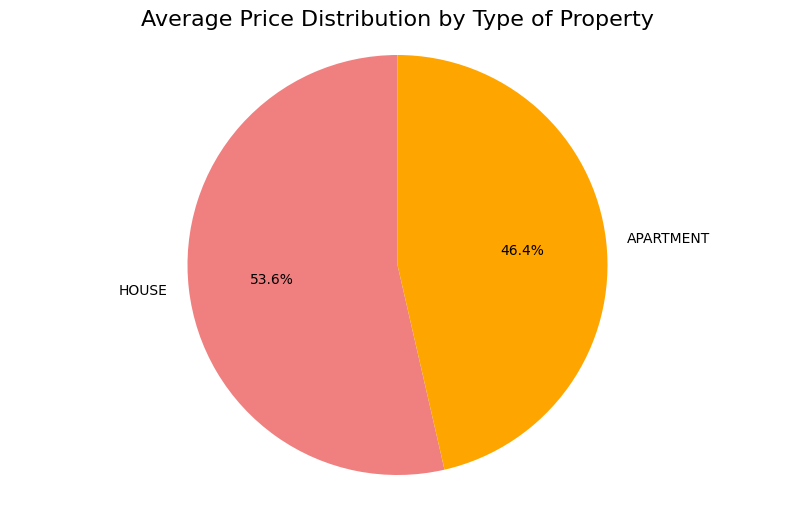

In [92]:
plt.figure(figsize = (10, 6))
plt.pie(type_home['price'], labels = type_home['typeofproperty'], autopct = '%1.1f%%', startangle = 90, colors = ['lightcoral', 'orange', ]);
plt.title('Average Price Distribution by Type of Property', fontsize=16)
plt.axis('equal')
plt.show()

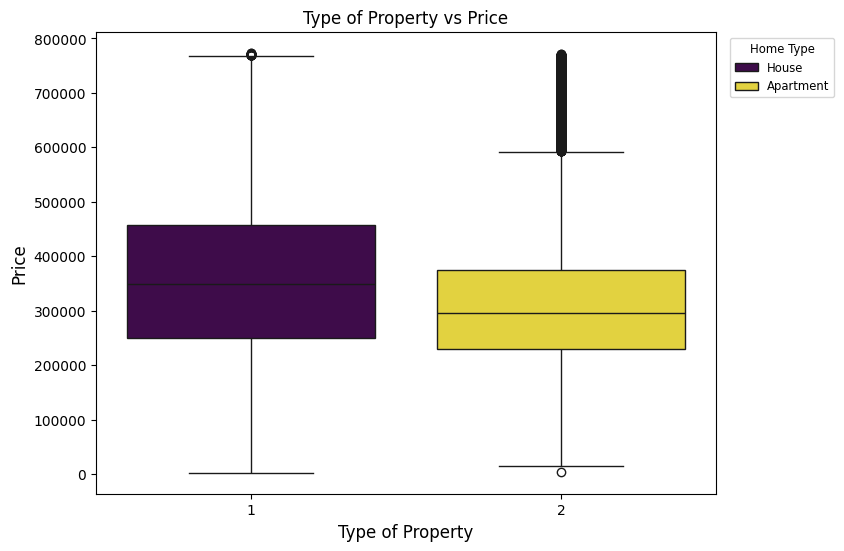

In [68]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'typeofproperty', y = 'price',hue = 'typeofproperty', data = df, ax=ax, palette='viridis')
plt.title('Type of Property vs Price')
plt.xlabel('Type of Property',  fontsize = 12)
plt.ylabel('Price',  fontsize = 12)

legend_labels = ['House','Apartment']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.20, 1), title='Home Type', fontsize='small', title_fontsize='small')

plt.show()

In [32]:
kitchen_stats = df.groupby('kitchen')['price'].mean().reset_index()
kitchen_stats.head()

,kitchen,price
0,0,271742.412517
1,1,311457.251577
2,2,343519.657194
3,3,424626.495046


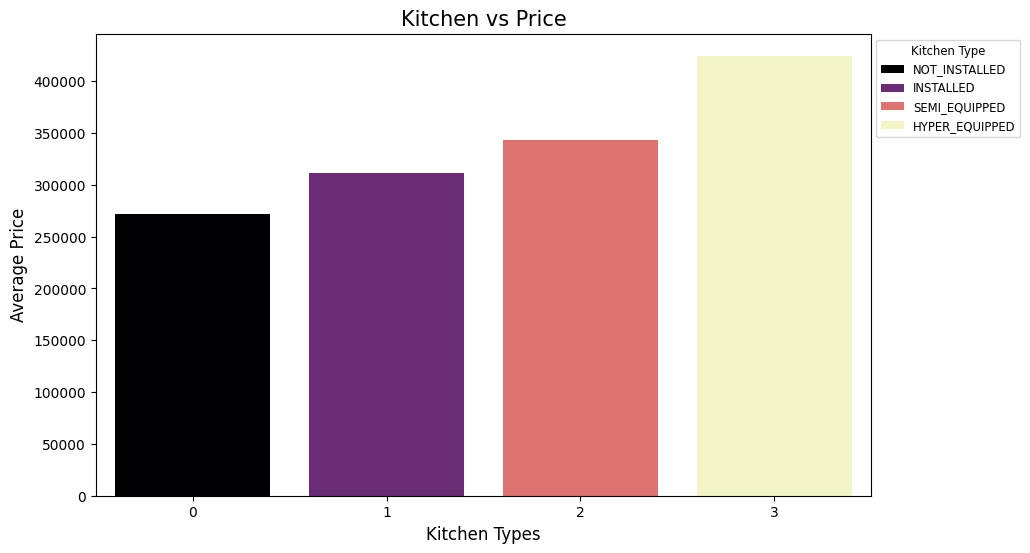

In [51]:


plt.figure(figsize=(10, 6))
sns.barplot(data = kitchen_stats, y="price", x="kitchen",hue = 'kitchen', palette='magma');
plt.xlabel('Kitchen Types',  fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.title('Kitchen vs Price',  fontsize = 15)



legend_labels = ['NOT_INSTALLED','INSTALLED','SEMI_EQUIPPED','HYPER_EQUIPPED']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.20, 1), title='Kitchen Type', fontsize='small', title_fontsize='small')


plt.show()

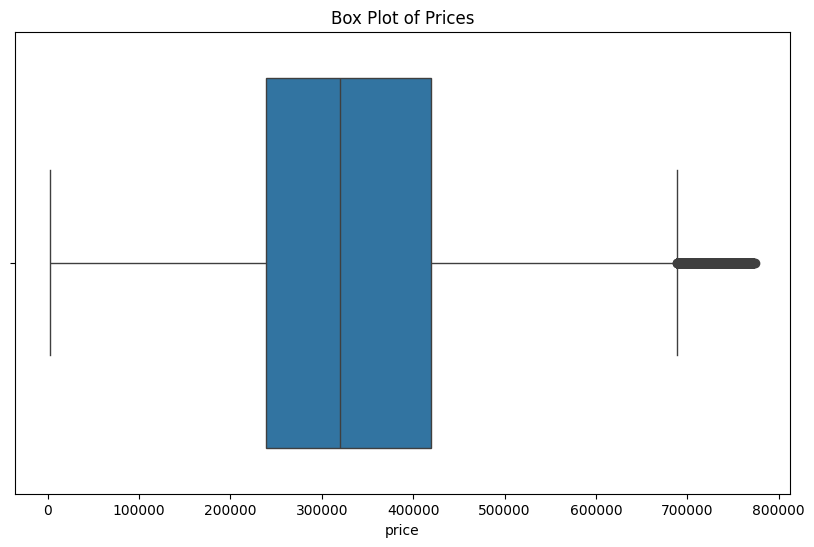

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.show()

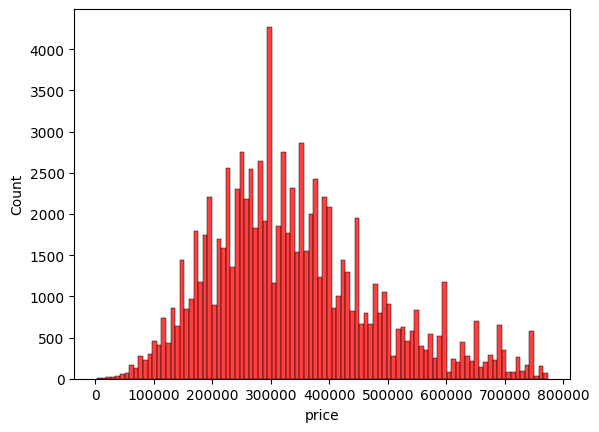

In [53]:
sns.histplot(df.price, color='r', kde = False)
plt.show()

In [57]:

correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation

,price
price,1.000000
bedroomcount,0.377297
kitchen,0.299656
roomcount,0.268313
swimmingpool,0.236449
stateofbuilding,0.228995
numberoffacades,0.225207
bathroomcount,0.197276
constructionyear,0.179481
surfaceofplot,0.128378


In [61]:
bedroom = df.groupby('bedroomcount')['price'].mean().reset_index()

bedroom.head()

,bedroomcount,price
0,0,262702.998084
1,1,234326.820557
2,2,306537.774229
3,3,372862.081670
4,4,406025.420822


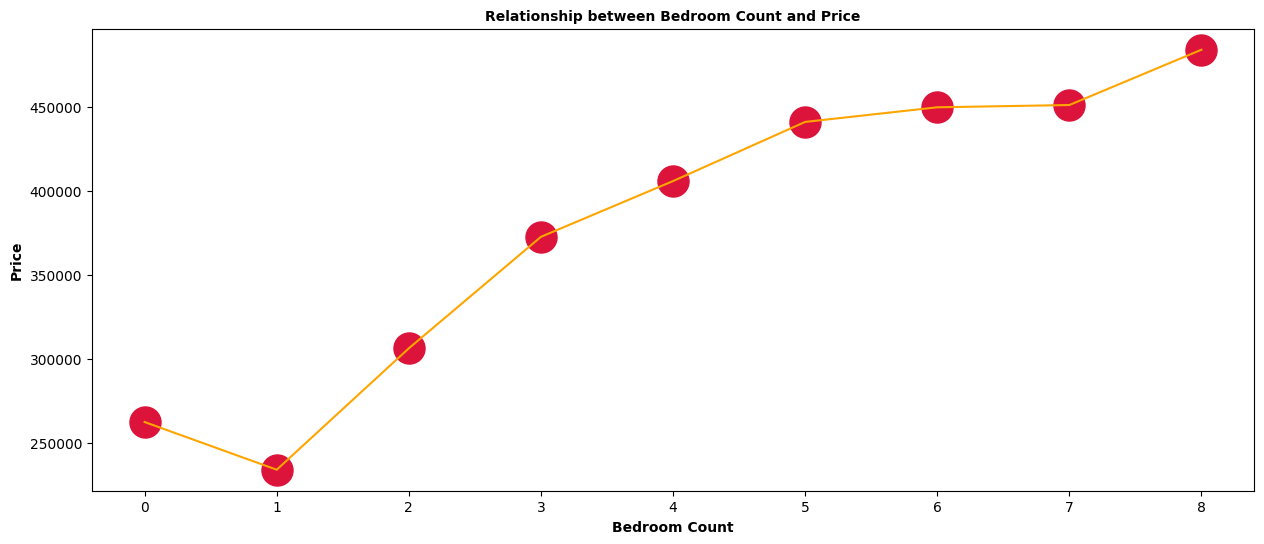

In [74]:
plt.figure(figsize=(15, 6))
plt.scatter(data=bedroom, x='bedroomcount', y='price', color='crimson', alpha=1, s=500)
plt.plot(bedroom['bedroomcount'], bedroom['price'], color = 'orange')  
plt.title("Relationship between Bedroom Count and Price", weight='bold', fontsize=10)
plt.xlabel("Bedroom Count", weight='bold')
plt.ylabel("Price", weight='bold')
plt.show()

#### *Let's see the correlation of numerical features with the target value*

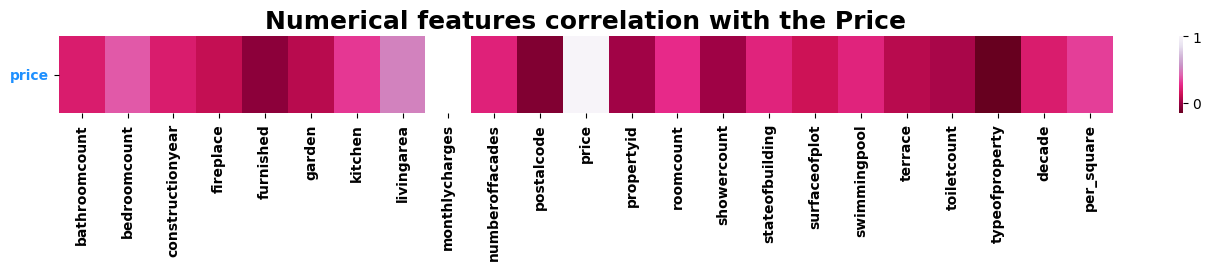

In [57]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))


sns.heatmap(corr_num.sort_values(by = ['price'], ascending = False).head(1), cmap = 'PuRd_r');
plt.title("Numerical features correlation with the Price", weight = 'bold', fontsize = 18)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold', color = 'dodgerblue', rotation = 0)

plt.show()

In [ ]:
correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation
